# Wind Park Ubication

Este notebook ubica geográfiacamente los parque eólicos para su localización visual. El **objetivo** final es poder añadir una capa a la creada en este notebook con los datos de **rugosidad del terreno**.

Al tener la **rugorosidad del terreno como metadato** de cada uno de los rotores, se podría considerar como parámetro en la verificación de los diferentes modelos de machine learning que se utilicen. 

Se considera como *hipótesis* antes de la experimentación que la rugorisidad del terreno, cuando es alta, produce inestabilidad en la capa límite planetaria, implicando una mayor no-linealidad en el fluido.

**Python package:**

* pymongo: los metadatos de los rotores se encuentran almacenados en BBDD No-SQL documental, se ha seleccionado MongoDB.

* cartopy: python package desarrollado por el Centro Nacional de Meteorología del Reino Uniodo (Met Office), que permite visualizar datos empaquetados en formato binario netCDF o GRIB2, además de cualquier conjunto de datos dentro de un numpy array.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy
import pymongo

In [30]:
class ViewMap:
      
    def geo_wind_park(self, cursor, plot_title=None):
        plt.figure(figsize=(15, 15))

        ax = plt.axes(projection=cartopy.crs.PlateCarree())
        ax.set_extent([-15, -180, 90, 0])

        ax.add_feature(cartopy.feature.LAND)
        ax.add_feature(cartopy.feature.OCEAN)
        ax.add_feature(cartopy.feature.COASTLINE)
        ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
        ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
        ax.add_feature(cartopy.feature.RIVERS)
        for doc in cursor:
            #print(doc)
            ax.plot( float(doc["longitude"]), 
                    float(doc["latitude"]),
                    marker='o', color="r")
        if plot_title is not None:         
            plt.title('{0}'.format(plot_title),
                      fontsize=20)

In [23]:
cliente = pymongo.MongoClient()
df = cliente['wind_park']
collection = df['metadata']



In [24]:
cursor = collection.find_one()
cursor

{'_id': ObjectId('5a68e5a53aa99c06c9c9667b'),
 'elevation': 849.5,
 'latitude': 31.192,
 'longitude': -102.242,
 'power_capacity': 30.823,
 'power_density': 413.925,
 'speed': 7.741,
 'turbine_id': 1,
 'wind_park': 'TX'}

In [25]:
collection.find_one({'wind_park':'TX'})

{'_id': ObjectId('5a68e5a53aa99c06c9c9667b'),
 'elevation': 849.5,
 'latitude': 31.192,
 'longitude': -102.242,
 'power_capacity': 30.823,
 'power_density': 413.925,
 'speed': 7.741,
 'turbine_id': 1,
 'wind_park': 'TX'}

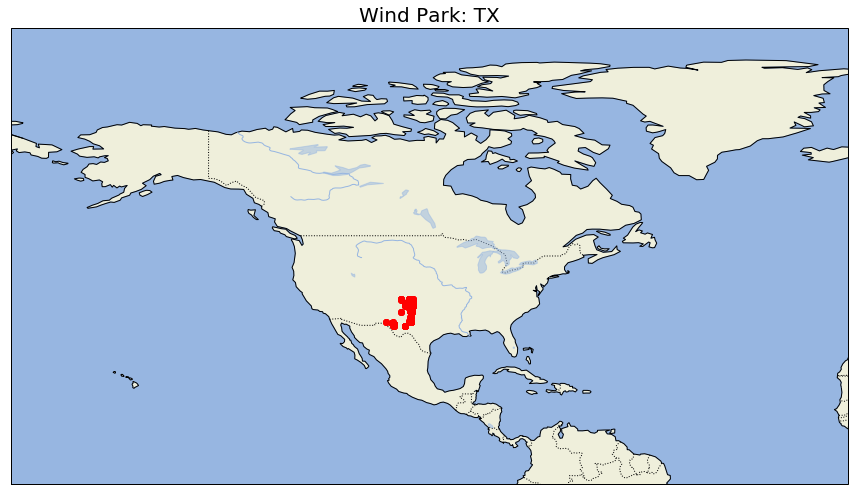

In [31]:
cursor = collection.find({'wind_park':'TX'})

#for i in cursor:
#    print(i)

plot_map = ViewMap()
plot_map.geo_wind_park(cursor, plot_title='Wind Park: TX')

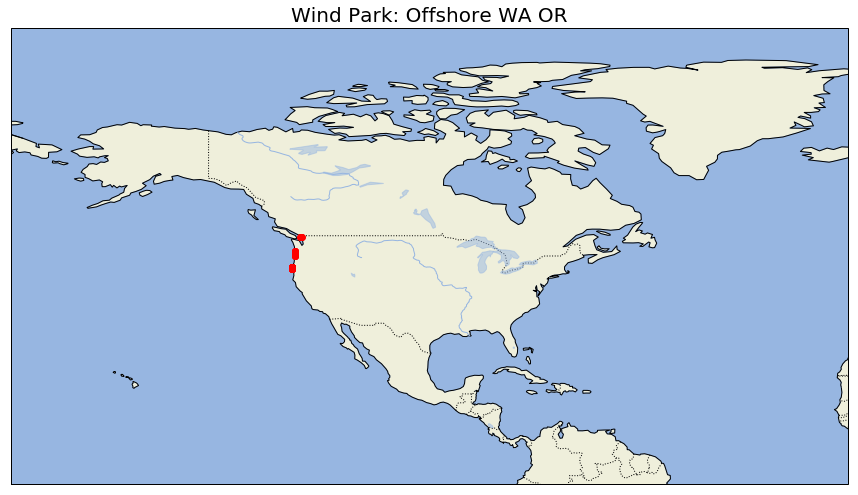

In [32]:
cursor = collection.find({'wind_park':'Offshore_WA_OR'})
plot_map = ViewMap()
plot_map.geo_wind_park(cursor, plot_title='Wind Park: Offshore WA OR')